# RandomForest Model for Regression 
## This model is built on a dummy dataset 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


## EDA

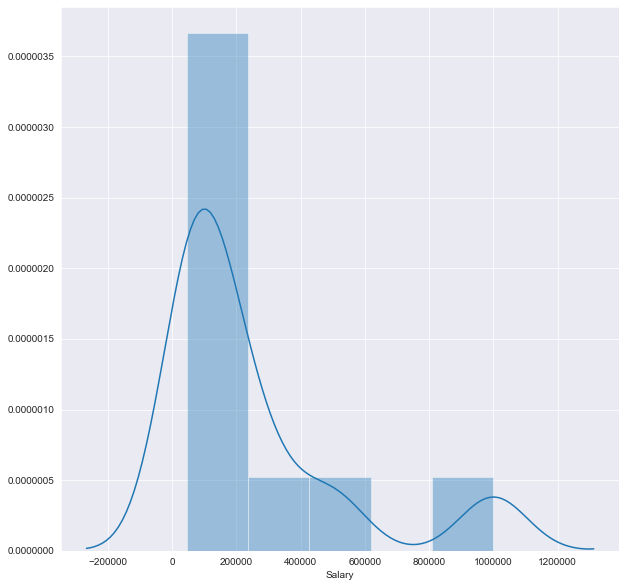

In [5]:
plt.figure(figsize=([10,10]))
sns.set_style('darkgrid')
sns.distplot(data['Salary'])

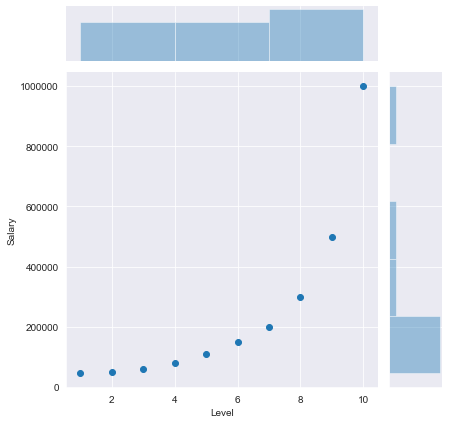

In [6]:
sns.jointplot(x='Level',y='Salary',data=data,kind='scatter')

## Model building/ Training

In [7]:
X = data.iloc[:,-2].values
y = data.iloc[:,-1].values
X,y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
model = RandomForestRegressor(n_estimators=25)

In [10]:
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([[  45000],
        [  50000],
        [  60000],
        [  80000],
        [ 110000],
        [ 150000],
        [ 200000],
        [ 300000],
        [ 500000],
        [1000000]], dtype=int64))

In [11]:
model.fit(X,y)

C:\Users\Nelson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [12]:
predictions = model.predict([[7]])
predictions

array([214000.])

## Model Performance Analysis

In [13]:
print(model.score(X,y))

0.92131496455901


In [14]:
print(f'actual value is : {y[6,0]}')
print(f'Predicted value is:{model.predict([[7]])[0]}')

actual value is : 200000
Predicted value is:214000.0


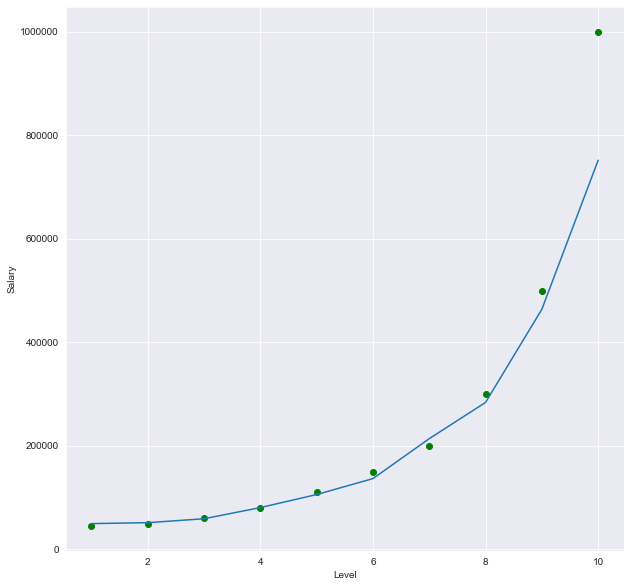

In [15]:
plt.figure(figsize=([10,10]))
plt.scatter(X,y,c='green')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.plot(X,model.predict(X))

In [16]:
model.feature_importances_

array([1.])